In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import time


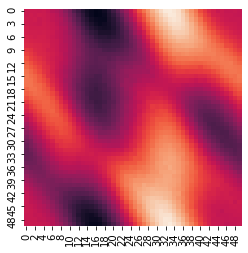

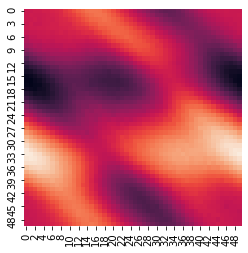

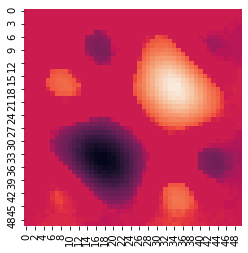

      0     1     2             3             4             5   6
0     0  0.00  0.00  1.782970e-07  1.782960e-07  0.000000e+00 NaN
1     0  0.00  0.04  3.039040e-07  1.283430e-06  0.000000e+00 NaN
2     0  0.00  0.08  3.933810e-07  3.324790e-06  0.000000e+00 NaN
3     0  0.00  0.12 -5.357000e-07  3.435230e-06  0.000000e+00 NaN
4     0  0.00  0.16  9.704470e-07  1.002910e-05  0.000000e+00 NaN
...  ..   ...   ...           ...           ...           ...  ..
2495  0  1.96  1.80 -4.950650e-06  2.372910e-07  1.511700e-05 NaN
2496  0  1.96  1.84 -1.237620e-05  1.410280e-06  3.697120e-05 NaN
2497  0  1.96  1.88 -8.042060e-06 -2.727580e-06  1.546250e-05 NaN
2498  0  1.96  1.92 -8.541070e-06 -4.789530e-06  8.063730e-06 NaN
2499  0  1.96  1.96 -5.772100e-06 -5.772100e-06 -1.253570e-12 NaN

[2500 rows x 7 columns]


In [18]:
# read txt file and make it a pandas data frame
path = r'G:\\PROJECTS\\Heterogeneous GridBot Configuration (Yorick)\\New c project\New c project\\test4.txt'

# txt file to pandas data frame
df = pd.read_csv(path, sep=',', header=None)

# make column 3 a np matrix based on column 1 and 2
mat = df[3].values.reshape(50, 50)
sns.heatmap(mat,square=True, cbar=False)
plt.show()
mat = df[4].values.reshape(50, 50)
sns.heatmap(mat,square=True, cbar=False)
plt.show()
mat = df[5].values.reshape(50, 50)
sns.heatmap(mat,square=True, cbar=False)
plt.show()

print(df)





In [47]:
import numpy as np
import matplotlib.pyplot as plt

class Node:
    def __init__(self, mass, x0, y0, vx0, vy0):
        self.mass = mass
        self.position = np.array([x0, y0])
        self.velocity = np.array([vx0, vy0])

class Spring:
    def __init__(self, node1, node2, k):
        self.node1 = node1
        self.node2 = node2
        self.spring_constant = k

def mass_spring_integration(nodes, springs, dt, num_steps):
    num_nodes = len(nodes)
    num_springs = len(springs)

    # Create the state matrix A
    A = np.zeros((2 * num_nodes, 2 * num_nodes))
    for i, spring in enumerate(springs):
        node1 = spring.node1
        node2 = spring.node2
        k = spring.spring_constant

        for dim in range(2):
            A[2 * nodes.index(node1) + dim, 2 * nodes.index(node1) + dim] -= k / node1.mass
            A[2 * nodes.index(node1) + dim, 2 * nodes.index(node2) + dim] += k / node1.mass
            A[2 * nodes.index(node2) + dim, 2 * nodes.index(node1) + dim] += k / node2.mass
            A[2 * nodes.index(node2) + dim, 2 * nodes.index(node2) + dim] -= k / node2.mass


    # Create the time step matrix B
    B = np.zeros((2 * num_nodes, 2 * num_nodes))
    for i, node in enumerate(nodes):
        B[2 * i, 2 * i] = dt / node.mass
        B[2 * i + 1, 2 * i + 1] = dt / node.mass

    # Initialize arrays to store positions and velocities
    positions = np.zeros((num_nodes, 2, num_steps))
    velocities = np.zeros((num_nodes, 2, num_steps))

    # Set initial conditions
    for i, node in enumerate(nodes):
        positions[i, :, 0] = node.position
        velocities[i, :, 0] = node.velocity

    Matrix = np.zeros((2 * num_nodes , 4 * num_nodes))
    Matrix[0:2 * num_nodes, 0:2 * num_nodes] = A
    Matrix[ 0:2 * num_nodes , 2 * num_nodes:4 * num_nodes] = B
    print(Matrix.shape)
    print(Matrix)

    # Perform numerical integration using matrix operations
    for i in range(1, num_steps):
        state = np.concatenate((positions[:, :, i - 1].flatten(), velocities[:, :, i - 1].flatten()))
        print(state.shape)
        print(A.shape)
        print(B.shape)

        state = np.dot(Matrix, state)
        print(state.shape)
        print(state[:2 * num_nodes].reshape((num_nodes, 2)))
        positions[:, :, i] = state[:2 * num_nodes].reshape((num_nodes, 2))
        velocities[:, :, i] = state[2 * num_nodes:].reshape((num_nodes, 2))

    return positions, velocities

# Define the nodes and springs
node1 = Node(mass=1.0, x0=0.0, y0=0.0, vx0=0.0, vy0=0.0)
node2 = Node(mass=2.0, x0=1.0, y0=0.0, vx0=0.0, vy0=0.0)
node3 = Node(mass=0.5, x0=-1.0, y0=1.0, vx0=0.0, vy0=0.0)

spring1 = Spring(node1, node2, k=1.0)
spring2 = Spring(node2, node3, k=0.5)

nodes = [node1, node2, node3]
springs = [spring1, spring2]

# Define integration parameters
dt = 0.01
num_steps = 1000

num_nodes = len(nodes)
num_springs = len(springs)

# Create the state matrix A
A = np.zeros((2 * num_nodes, 2 * num_springs))
for i, spring in enumerate(springs):
    node1 = spring.node1
    node2 = spring.node2
    k = spring.spring_constant

    for dim in range(2):
        A[2 * nodes.index(node1) + dim, i] -= k
        A[2 * nodes.index(node2) + dim, i] += k



print(A)
# # Perform numerical integration
# positions, velocities = mass_spring_integration(nodes, springs, dt, num_steps)

# # Plot the results
# time = np.arange(0, num_steps * dt, dt)
# for i in range(len(nodes)):
#     plt.plot(positions[i, 0, :], positions[i, 1, :], label=f'Node {i+1}')
# plt.xlabel('X position')
# plt.ylabel('Y position')
# plt.legend()
# plt.show()

[[-1.   0.   1.   0.   0.   0. ]
 [ 0.  -1.   0.   1.   0.   0. ]
 [ 1.   0.  -1.5  0.   0.5  0. ]
 [ 0.   1.   0.  -1.5  0.   0.5]
 [ 0.   0.   0.5  0.  -0.5  0. ]
 [ 0.   0.   0.   0.5  0.  -0.5]]


In [48]:
import numpy as np

class Node:
    def __init__(self, mass, x0, y0):
        self.mass = mass
        self.position = np.array([x0, y0])

class Spring:
    def __init__(self, node1, node2, k):
        self.node1 = node1
        self.node2 = node2
        self.spring_constant = k

def create_connectivity_matrix(nodes, springs):
    num_nodes = len(nodes)
    num_springs = len(springs)

    connectivity_matrix = np.zeros((springs, num_nodes))

    for spring in springs:
        node1_index = nodes.index(spring.node1)
        node2_index = nodes.index(spring.node2)

        

    return connectivity_matrix

# Define the nodes and springs
node1 = Node(mass=1.0, x0=0.0, y0=0.0)
node2 = Node(mass=2.0, x0=1.0, y0=0.0)
node3 = Node(mass=0.5, x0=-1.0, y0=1.0)
node4 = Node(mass=0.5, x0=-3.0, y0=3.0)

spring1 = Spring(node1, node2, k=1.0)
spring2 = Spring(node2, node3, k=0.5)
spring3 = Spring(node3, node4, k=0.5)

nodes = [node1, node2, node3, node4]
springs = [spring1, spring2, spring3]

# Create the connectivity matrix
connectivity_matrix = create_connectivity_matrix(nodes, springs)

print(connectivity_matrix)

TypeError: 'list' object cannot be interpreted as an integer

In [54]:
A = np.ones((2, 3))
print(np.zeros((2, 3)))
b = np.arange(0,3)
print(np.arange(0,3))
A.dot(b)

[[0. 0. 0.]
 [0. 0. 0.]]
[0 1 2]


array([3., 3.])